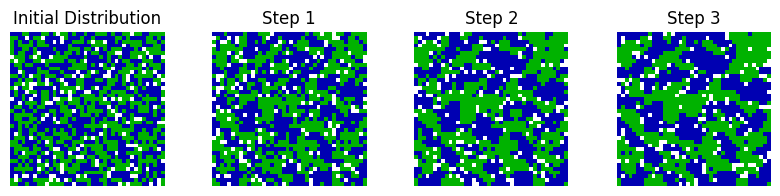

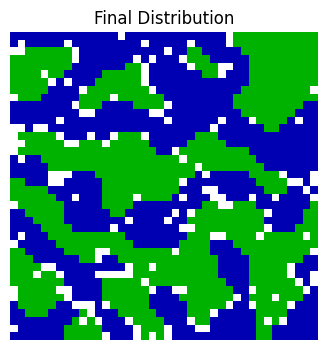

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from myst_nb import glue

def initialise_grid(N, n):
    x = np.zeros((N, N))
    k = 0
    while k < n:
        i = np.random.randint(N)
        j = np.random.randint(N)
        if x[i,j] == 0:
            k += 1
            x[i,j] = 1
    k = 0
    while k < n:
        i = np.random.randint(N)
        j = np.random.randint(N)
        if x[i,j] == 0:
            k += 1
            x[i,j] = 2
    
    return x

def neighbours_same(x, i, j):
    N = len(x)
    count = 0
    for a in range(max((i-1), 0), min(i+2, N)):
        for b in range(max((j-1), 0), min(j+2, N)):
            if x[a, b] == x[i,j]:
                count = count + 1
    count = count - 1
    return count

def neighbours_total(x, i, j):
    N = len(x)
    count = 0
    for a in range(max((i-1), 0), min(i+2, N)):
        for b in range(max((j-1), 0), min(j+2, N)):
            if x[a, b] != 0:
                count = count + 1
    if x[i, j] != 0:
        count = count - 1
    return count

def get_dissatisfied_cells(x, f):
    N = len(x)
    dis = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            same = neighbours_same(x, i, j)
            total = neighbours_total(x, i, j)
            if x[i,j] != 0 and total != 0 and same/total < f:
                dis[i,j] = 1
    return dis
            
def advance(x, f):
    N = len(x)
    dis = get_dissatisfied_cells(x, f)
    result = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if dis[i, j] == 0:
                result[i, j] = x[i, j]
                
    for i in range(N):
        for j in range(N):
            if dis[i, j] == 1:
                i_new = np.random.randint(N)
                j_new = np.random.randint(N)
                while result[i_new, j_new] != 0:
                    i_new = np.random.randint(N)
                    j_new = np.random.randint(N)
                result[i_new, j_new] = x[i, j]
    return result

N = 40
n = int(N**2 * .45)
f = 0.5
num = 25

np.random.seed(0)

grid = initialise_grid(N, n)

grid_all = np.zeros((N, N, num + 1))
grid_all[:,:,0] = grid

for i in range(num):
    
    grid = advance(grid, f)
    grid_all[:,:,i+1] = grid

fig, axes = plt.subplots(1, 4, figsize=(10,2))
colours = np.array([[1, 1, 1, 1],
                    [0, .7, 0, 1],
                    [0, 0, .7, 1]])
cm = ListedColormap(colours)

for i in range(4):

    axes[i].imshow(grid_all[:,:,i], cmap=cm)
    axes[i].axis("off")
    axes[i].set_title("Step " + str(i))

axes[0].set_title("Initial Distribution")

glue("neighbourhood_fig", fig, display=False)

fig = plt.figure(figsize=(4,4))
plt.imshow(grid_all[:,:,-1], cmap=cm)
plt.axis("off")
plt.title("Final Distribution")

glue("final_distribution_fig", fig, display=False)



# NSCI0007 Coursework

## Background

Suppose there are two species of organism living in a neighbourhood. The organisms are initially spread about the neighbourhood at random, but are free to move around the neighbourhood as they wish. The organisms are lazy and so in general will stay where they are; however they have a slight preference for being surrounded by organisms of the same species. If too many of their immediate neighbours are of the opposite species, they will move to another location in the neighbourhood. Over time, the distribution of organisms will shift ({numref}`fig-neighbourhood`).

```{glue:figure} neighbourhood_fig
:figwidth: 600px
:name: "fig-neighbourhood"

Organisms of two species (blue and green) are initially spread around the neighbourhood at random, with some cells empty (white). At each time step, dissatisfied organisms move into unoccupied cells, resulting in shifting patterns of organism locations.

```

The neighbourhood consists of a square grid of cells, each of which is either empty or occupied by an organism of one of the two species. Populations of the two species are initially placed into random locations of a neighbourhood represented by a grid ({numref}`grid1_fig`).

```{figure} grid1.png
---
name: grid1_fig
height: 150px
---
Organisms of two species (X and O) are placed at random in a 5 by 5 grid.
```

The organisms prefer to be surrounded by organisms of the same type. An organism is *satisfied* if it is surrounded by at least a fraction $f$ of organisms that are of a like species.

Let's assume that $f = 0.3$, meaning that an organism is satisfied when at least 30% of its neighbours are the same species as itself. If the organism is satisfied, then it will remain in its current location. If fewer than 30% are the same species, then the organism is not satisfied, and it will want to change its location in the grid.

{numref}`grid2_fig` (left) shows a satisfied organism because 50% of X's neighbors are also X $(50\% > f)$. The next X (right) is dissatisfied because only 25% of its neighbours are X $(25\% < f)$. Notice that empty cells are not counted when calculating similarity.

```{figure} grid2.png
---
name: grid2_fig
height: 150px
---
An organism is satisifed if the proportion of its neighbours which are of the same species is greater than $f$, otherwise it is dissatisfied. Given $f=0.3$, the organism indicated in the left panel is satisfied because 50% of its neighbours are X, whereas the organism indicated in the right panel is dissatisfied because only 25% of its neighbours are X.
```

When an organism is not satisfied, it is moved to a an empty cell in the grid. The new location is chosen at random from amongst the empty cells.

In {numref}`grid3_fig` (left), all dissatisfied organisms have an asterisk next to them. {numref}`grid3_fig` (right) shows the new configuration after all the dissatisfied organisms have been moved to unoccupied cells at random. Note that the new configuration may cause some organisms which were previously satisfied to become dissatisfied.

```{figure} grid3.png
---
name: grid3_fig
height: 150px
---
In the left panel, all dissatisfied organisms have an asterisk next to them. In the right panel, all the dissatisfied organisms have been moved to unoccupied cells at random.
```

All dissatisfied organisms are moved in the same round. After the round is complete, a new round begins, and dissatisfied organisms are once again moved to new locations in the grid. These rounds continue until all organisms in the neighbourhood are satisfied with their location ({numref}`fig-final_distribution`).

```{glue:figure} final_distribution_fig
:name: "fig-final_distribution"
:figwidth: 600px
For certain values of $f$, the distribution settles down to a stable pattern with the species segregated into distinct regions.
```

## Coursework Brief

Your goal is to simulate the evolution of the distribution of organisms for various values of the parameter $f$. Your solution should be presented as a single Python notebook including working code and explanatory text.

Your notebook should:
- run without errors
- complete execution in no more than 1 minute
- be well-organised with import statements, functions and executable code clearly separated
- not include any redundant code
- include sufficient text and/or comments such that a reader could easily understand the flow of your program

> A maximum of **5 marks** will be awarded to submissions that meet these requirements.

## Part 1

You will model the grid as an array containing the values `1` and `2` which represent the two species of organism and `0` which represents an empty cell.

### Step 1

Write a function `initialise_grid(N, n)` which returns an `N` by `N` array containing `n` `1`s and `n` `2`s placed at random cells in the array. Be sure that the returned array contains **exactly** the right number of `1`s and `2`s.

You can use the following pseudocode to help you. It creates an `N` by `N` array with exactly `n` `1`s. 

```{div} pseudocode
Set x to empty N by N array  
Set counter to zero  
Repeat until counter equals n:  
&nbsp;&nbsp;&nbsp;&nbsp;Set i to random integer between 0 and N - 1  
&nbsp;&nbsp;&nbsp;&nbsp;Set j to random integer between 0 and N - 1  
&nbsp;&nbsp;&nbsp;&nbsp;If the value of x at i, j is 0:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;set the value of x at i, j to 1  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;increase counter by 1  
```

You can use the `numpy` function `randint` to generate a random integer in a given range. 

Test that your code works as below (your function will not return this exact output, but it should return a 4 by 4 array with exactly the right number of `1`s and `2`s.)

In [2]:
grid = initialise_grid(4, 5)

# A 4 by 4 array with exactly 5 `1`s and 5 `2`s
print(grid)

[[0. 1. 2. 0.]
 [1. 2. 2. 0.]
 [0. 2. 1. 0.]
 [1. 1. 2. 0.]]


> **5 marks** will be awarded for a function which correctly returns an array as described and **1 mark** for including the test case.

### Step 2

Write a function `neighbours_same(x, i, j)` which returns the number of neighbours that are of the same species as cell `i, j`. Be careful that your function doesn't go beyond the borders of the grid!

Test that your function works correctly in the following cases.

In [3]:
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(neighbours_same(x_test, 0, 0))
print(neighbours_same(x_test, 0, 1))
print(neighbours_same(x_test, 1, 0))
print(neighbours_same(x_test, 1, 1))

1
1
0
2


> **5 marks** for a function which returns the correct value for all possible arguments `x`, `i` and `j`, and **1 mark** for including the test cases.

### Step 3

Write a function `neighbours_total(x, i, j)` which returns the total number of non-empty neighbouring cells of cell `i, j`. Check that your function works in the following cases.

In [4]:
print(neighbours_total(x_test, 0, 0))
print(neighbours_total(x_test, 0, 1))
print(neighbours_total(x_test, 1, 0))
print(neighbours_total(x_test, 1, 1))

2
4
5
6


> **5 marks** for a function which returns the correct value for all possible arguments `x`, `i` and `j`, and **1 mark** for including the test cases.

### Step 4

Write a function `get_dissatisfied_cells(x, f)` which returns an `N` by `N` array whose values are `1` for cells containing a dissatisfied organism, or `0` otherwise. An organism is dissatisfied if the fraction of its neighbours which are the same as it is less than `f`. Use should use your functions `neighbours_same` and `neighbours_total` to calculate the fraction of like neighbours.

Test that your function works for the array `x_test`.

In [5]:
f = 0.4

print(get_dissatisfied_cells(x_test, f))

[[0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]


> **5 marks** for a function which executes correctly for all possible arguments `x` and `f`, and **1 mark** for including the test case.

### Step 5 

Write a function `advance(x, f)` which returns the array of cells after moving all dissatisfied organisms to an unoccupied cell.

You will need to do this in two steps:

1. **Satisfied organisms stay where they are:** create an empty array `result`. Loop over all cells, and for each satisfied cell set the value of `result` to the same value as the equivalent cell in `x`.
2. **Dissatisfied organisms move to a random empty cell:** loop over all cells again. For each dissatisfied cell, choose a random empty cell in `result` and set its value to the species number.

Check your code works as below (you won't get exactly the same result of course).

In [6]:
f = 0.3

x2 = advance(x_test, f)
print(x2)

[[2. 0. 1. 0. 1.]
 [0. 1. 1. 1. 1.]
 [2. 2. 2. 1. 1.]
 [2. 2. 2. 2. 2.]
 [2. 1. 1. 0. 0.]]


> **8 marks** for a function which works as described for all possible imputs of `x` and `f`, **1 mark** for including the test case.

### Step 6

Initialise a grid an `20` by `20` array with 45% of cells occupied by species 1, 45% occupied by species 2 and 10% unoccupied. Run the simulation for `10` iterations with `f = 0.4`. Display the contents of the array at each step using the function `matplotlib.pyplot.imshow`.

> **2 marks** for correctly initialising the grid, **6 marks** for executing the simulation and displaying the results.

## Part 2

In some cases the simulation reaches a stable pattern, whereas in others the distribution keeps changing indefinitely.

For what values of $f$ does the grid eventually reaching a stable pattern? Investigate how the behaviour of the model depends on the value this parameter.

Express your answer using code, figures and text. Take care with the presentation of your answer, including professionally formatted figures and explanations written in paragraph form.

> A maximum of **14 marks** for an investigation that fully explores the question.

---

**Total marks: 60**